# Building a Linear Regression Model to Appraise King County Home Prices

## Overview

## Business Problem

Centurion Appraisals conducts residential appraisals, divorce appraisals, estate appraisals, and retroactive and relocation appraisals, helping you to make sure that you get an accurate valuation for any of your property valuation needs.

Imagine there was an easier way for Centurion Appraisal to estimate housing prices using an algorithm to assist in the process of property valuation. By inputting the features of the property, the appraiser can quickly generate an appraisal. Understanding the predictive power of the different features will allow appraisers to better understand what home features need to be examined more closely in person and create a more efficient appraisal process overall. Note that Centurion only appraises homes greater than $250k and less than $15M.

## Data Understanding

This analysis utilizes the King County house sales data from 2021-2022 from the King County assessors data portal. This data set contains features of home including but not limited to square footage, floors, bathrooms and condition. In this analysis, our target variable is 'Sale Price'.

Local education data was also collected from the Washington State 2021-2022 Report Card Data set per each district in the county.

Location data (latitude and longitude) for Amazon, University of Washington, and Microsoft was collected from Wikipedia.

### Tools Used to Explore, Process, Model and Evaluate the Data

In [1]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Notebook Options
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## EDA and Data Preparation

In [2]:
# Import king county residential home sales data and inspect
house_data_df = pd.read_csv('../data/kc_house_data.csv')
house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# Look at statistics for numerical columns
house_data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669912,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


- The min sqft_living value is 3. This is most likely a data entry error, as 3 sqft is well below the minimum square footage for a structure to be legally considered a home in Washington State. We will need to drop this row.

In [4]:
# Drop row where 3ft living space is clearly a data entry error
house_data_df = house_data_df.drop(index=(house_data_df[house_data_df['sqft_living'] == 3].index.values))

In [5]:
# Check for missing values and check what types of data we are dealing with
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30154 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30154 non-null  int64  
 1   date           30154 non-null  object 
 2   price          30154 non-null  float64
 3   bedrooms       30154 non-null  int64  
 4   bathrooms      30154 non-null  float64
 5   sqft_living    30154 non-null  int64  
 6   sqft_lot       30154 non-null  int64  
 7   floors         30154 non-null  float64
 8   waterfront     30154 non-null  object 
 9   greenbelt      30154 non-null  object 
 10  nuisance       30154 non-null  object 
 11  view           30154 non-null  object 
 12  condition      30154 non-null  object 
 13  grade          30154 non-null  object 
 14  heat_source    30122 non-null  object 
 15  sewer_system   30140 non-null  object 
 16  sqft_above     30154 non-null  int64  
 17  sqft_basement  30154 non-null  int64  
 18  sqft_g

In [6]:
# Drop the handful of rows missing values for 'heat_source' & 'sewer_system'
house_data_df = house_data_df.dropna()
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sqft_g

- After addressing these missing values and the data entry error identified above, we are left with 30110 home sale records.

In [7]:
# Filter dataset to houses priced between $250k and $15mm per stakeholder instructions in business case
house_data_df = house_data_df.loc[(house_data_df['price'] >= 250000) & (house_data_df['price'] <= 15000000)]
house_data_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


### Drill down on individual columns to see if they need processing at the individual level

- id has no predictive value -it is just the unique identifier from the county's database system- so we can drop it right away

In [8]:
# Drop id column
house_data_df = house_data_df.drop(columns='id',axis=1)

In [9]:
# Check yr_renovated column
house_data_df['yr_renovated'].value_counts()

0       28355
2021       69
2006       48
2018       43
2004       41
        ...  
1972        1
1946        1
1947        1
1966        1
1924        1
Name: yr_renovated, Length: 81, dtype: int64

- rather than having no value, houses which have never been renovated have been assigned a value of 0
- we need to address this otherwise our model will interpret non-renovated houses as having been renovated year 0
  - furthermore there would be an outsized negative effect on our model given that the fast majority of houses in our dataset have not been renovated
- to address this, we will simplify renovation data and create a new column indicating whether or not a house has ever been renovated

In [10]:
# Convert yr_renovated to boolean column titled renovated
house_data_df['renovated'] = house_data_df['yr_renovated'].astype('bool')
house_data_df['renovated'].value_counts()

False    28355
True      1344
Name: renovated, dtype: int64

In [11]:
# Drop yr_renovated and convert boolean values to int
house_data_df = house_data_df.drop(columns='yr_renovated')
house_data_df['renovated'] = house_data_df['renovated'].astype(int)
house_data_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,address,lat,long,renovated
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,0
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,0
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,0
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,0


- to include date data in our modeling, we need to convert the current date data to datetime type

In [12]:
# Convert date column to datetime and extract month and year
house_data_df['date'] = pd.to_datetime(house_data_df['date'], format='%m/%d/%Y')

house_data_df['month'] = house_data_df['date'].dt.month
house_data_df['year'] = house_data_df['date'].dt.year

# Delete origninal date column
house_data_df = house_data_df.drop(columns='date')
house_data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_basement,sqft_garage,sqft_patio,yr_built,address,lat,long,renovated,month,year
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,...,0,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0,5,2022
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,...,1570,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0,12,2021
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,...,1580,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0,9,2021
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,...,1070,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0,12,2021
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,...,550,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,...,1130,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,0,11,2021
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,...,0,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,0,6,2021
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,...,920,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,0,5,2022
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,...,740,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,0,2,2022


In [13]:
# Create new df column to hold extracted zip codes and drop address
house_data_df['zip'] = house_data_df['address'].str[-20:-15]
house_data_df = house_data_df.drop(columns='address', axis = 1)

In [14]:
# Check zip code unique values
house_data_df['zip'].value_counts()

98042    972
98038    848
98103    758
98115    752
98117    746
        ... 
85295      1
61104      1
47546      1
32609      1
34470      1
Name: zip, Length: 398, dtype: int64

- West coast zip codes begin with 9, so there are clearly more data entry errors to address

#### Use list of King County zip codes from the county Open Data portal to address incorrect zip code data

In [15]:
# Import zip code data from county website to filter incorrect data out
kc_zip_codes = pd.read_csv('../data/king-co-zip-table.csv')
kc_zip_codes

,ZIPCODE,COUNTY,COUNTY_NAME,PREFERRED_CITY
0,98001,33,King County,AUBURN
1,98002,33,King County,AUBURN
2,98003,33,King County,FEDERAL WAY
3,98004,33,King County,BELLEVUE
4,98005,33,King County,BELLEVUE
...,...,...,...,...
204,98940,37,Kittitas County,RONALD
205,98941,37,Kittitas County,ROSLYN
206,98943,37,Kittitas County,SOUTH CLE ELUM
207,98946,37,Kittitas County,THORP


In [16]:
# Convert 'ZIPCODE' to string and store in list for filtering out erroneous zip codes in dataset
zip_str_list = kc_zip_codes['ZIPCODE'].astype(str)
zip_str_list

0      98001
1      98002
2      98003
3      98004
4      98005
       ...  
204    98940
205    98941
206    98943
207    98946
208    98950
Name: ZIPCODE, Length: 209, dtype: object

In [17]:
# Compare county zip list to home sales dataset and remove rows containing erroneous address info
mask = house_data_df['zip'].isin(zip_str_list)
house_data_df = house_data_df[mask]
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28788 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          28788 non-null  float64
 1   bedrooms       28788 non-null  int64  
 2   bathrooms      28788 non-null  float64
 3   sqft_living    28788 non-null  int64  
 4   sqft_lot       28788 non-null  int64  
 5   floors         28788 non-null  float64
 6   waterfront     28788 non-null  object 
 7   greenbelt      28788 non-null  object 
 8   nuisance       28788 non-null  object 
 9   view           28788 non-null  object 
 10  condition      28788 non-null  object 
 11  grade          28788 non-null  object 
 12  heat_source    28788 non-null  object 
 13  sewer_system   28788 non-null  object 
 14  sqft_above     28788 non-null  int64  
 15  sqft_basement  28788 non-null  int64  
 16  sqft_garage    28788 non-null  int64  
 17  sqft_patio     28788 non-null  int64  
 18  yr_bui

- removing rows with zip codes located out of the prescribed area drops total row count from 30110 to 28788

### Continue Examining Individual Columns to Identify Processing Needs

#### Nominal Data Columns

In [18]:
# Check sewer_system values
house_data_df.sewer_system.value_counts()

PUBLIC                24526
PRIVATE                4257
PRIVATE RESTRICTED        3
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

- since we only have a handful of "PRIVATE RESTRICTED" and "PUBLIC RESTRICTED" sewer types, we will drop those rows

In [19]:
# Drop rows with 'PRIVATE RESTRICTED' & 'PUBLIC RESTRICTED' values
house_data_df = house_data_df.loc[(house_data_df['sewer_system'] == 'PUBLIC') |
                                  (house_data_df['sewer_system'] == 'PRIVATE')]
# Check new df counts
house_data_df.sewer_system.value_counts()

PUBLIC     24526
PRIVATE     4257
Name: sewer_system, dtype: int64

In [20]:
#Inspect heat_source values
house_data_df.heat_source.value_counts()

Gas                  19928
Electricity           5849
Oil                   2838
Gas/Solar               92
Electricity/Solar       53
Other                   19
Oil/Solar                4
Name: heat_source, dtype: int64

- let's generate a density plot to see where we might bin heat_source values

<AxesSubplot: ylabel='Density'>

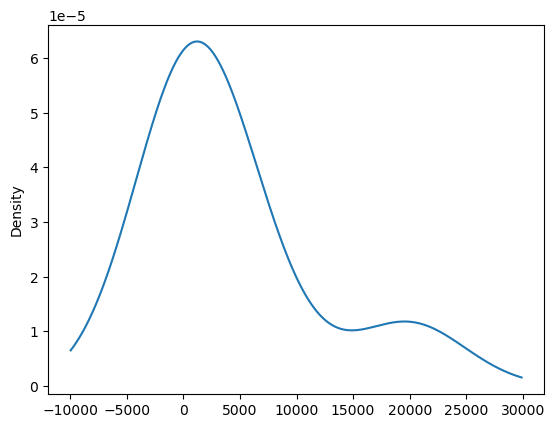

In [21]:
# Density plot of heat source values
heating_type_counts = house_data_df.heat_source.value_counts()
heating_type_counts.plot.density()

- based on the density plot and value counts data, we will set the binning threshold at a count of 2000
- The following heat sources will be binned into one group called Solar_Other
  - Gas/Solar
  - Electricity/Solar
  - Other 
  - Oil/Solar  

In [22]:
# Extract values with counts less than 2000 for binning
replace_heating_type = list(heating_type_counts[heating_type_counts < 2000].index)

# Replace in dataframe
for heating_type in replace_heating_type:
    house_data_df.heat_source = house_data_df.heat_source.replace(heating_type,"Solar_Other")
    
# Check to make sure binning was successful
house_data_df.heat_source.value_counts()

Gas            19928
Electricity     5849
Oil             2838
Solar_Other      168
Name: heat_source, dtype: int64

### Binary and Ordinal Data Columns

In [23]:
# Check data types
house_data_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
lat              float64
long             float64
renovated          int64
month              int64
year               int64
zip               object
dtype: object

- waterfront, greenbelt and nuisance data consists of 'yes' or 'no' responses which we can convert to numeric binary
- view, condition and grade data is ordinal and there is a string and corresponding numeric value for each rank 

In [24]:
# Handle Ordinal Data
## Convert yes/no columns to numeric binary
house_data_df['waterfront'] = house_data_df['waterfront'].map({'YES': 1, 'NO': 0})
house_data_df['greenbelt'] = house_data_df['greenbelt'].map({'YES': 1, 'NO': 0})
house_data_df['nuisance'] = house_data_df['nuisance'].map({'YES': 1, 'NO': 0})

## Convert ordinal conlumns to numeric rank
house_data_df['view'] = house_data_df['view'].map({'NONE': 0, 'FAIR': 1, 'AVERAGE' : 2, 'GOOD' : 3, 'EXCELLENT': 4})
house_data_df['condition'] =  house_data_df['condition'].map({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5})
house_data_df['grade'] = house_data_df['grade'].map({'1 Cabin': 1, '2 Substandard': 2, '3 Poor': 3, '4 Low': 4, '5 Fair': 5,'6 Low Average': 6,'7 Average': 7,'8 Good': 8,'9 Better': 9,'10 Very Good': 10,'11 Excellent': 11,'12 Luxury': 12,'13 Mansion': 13})

In [25]:
# check df to ensure correct categorical encoding
house_data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,month,year,zip
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,...,0,0,40,1969,47.461975,-122.19052,0,5,2022,98055
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,2,...,1570,0,240,1950,47.711525,-122.35591,0,12,2021,98133
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,2,...,1580,0,0,1956,47.502045,-122.22520,0,9,2021,98178
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,2,...,1070,200,270,2010,47.566110,-122.29020,0,12,2021,98118
4,592500.0,2,2.0,1120,758,2.0,0,0,1,0,...,550,550,30,2012,47.532470,-122.07188,0,8,2021,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,0,0,0,0,...,1130,0,210,1921,47.664740,-122.32940,0,11,2021,98103
30151,1313000.0,3,2.0,2020,5800,2.0,0,0,0,1,...,0,0,520,2011,47.565610,-122.38851,0,6,2021,98116
30152,800000.0,3,2.0,1620,3600,1.0,0,0,1,0,...,920,240,110,1995,47.610395,-122.29585,0,5,2022,98122
30153,775000.0,3,2.5,2570,2889,2.0,0,0,0,0,...,740,480,100,2006,47.449490,-122.18908,0,2,2022,98055


## Data Aggregation

### Calculate Education Metric for Inclusion in Model Features

- Data has been pulled from Washington State's Open Data Portal
- We used data from their 2021-2022 Annual Report Card database

In [26]:
# Calculate and append education score for each zip code
## Read in education data from Washington state data portal
school_data_df = pd.read_csv('../data/Report_Card_Assessment_Data_2021-22_School_Year (3).csv')
school_data_df

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,...,CurrentSchoolType,StudentGroupType,StudentGroup,GradeLevel,TestAdministration,TestSubject,Count of Students Expected to Test,Count of students expected to test including previously passed,CountMetStandard,PercentMetStandard
0,2021-22,District,King,Puget Sound Educational Service District 121,100006,17408,Auburn School District,100016,NaN,District Total,...,NaN,All,All Students,5,SBAC,ELA,1234.0,1234.0,582.0,47.20%
1,2021-22,District,King,Puget Sound Educational Service District 121,100006,17408,Auburn School District,100016,NaN,District Total,...,NaN,ELL,English Language Learners,5,SBAC,ELA,299.0,299.0,46.0,15.40%
2,2021-22,District,King,Puget Sound Educational Service District 121,100006,17408,Auburn School District,100016,NaN,District Total,...,NaN,ELL,Non-English Language Learners,5,SBAC,ELA,935.0,935.0,536.0,57.30%
3,2021-22,District,King,Puget Sound Educational Service District 121,100006,17408,Auburn School District,100016,NaN,District Total,...,NaN,Foster,Foster Care,5,SBAC,ELA,NaN,NaN,NaN,Suppressed: N<10
4,2021-22,District,King,Puget Sound Educational Service District 121,100006,17408,Auburn School District,100016,NaN,District Total,...,NaN,FRL,Non-Low Income,5,SBAC,ELA,407.0,407.0,271.0,66.60%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,Race,Hispanic/ Latino of any race(s),7,AIM,Math,NaN,NaN,NaN,Suppressed: N<10
15343,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,Race,White,7,AIM,Math,NaN,NaN,NaN,Suppressed: N<10
15344,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,Military,Non Military Parent,7,SBAC,ELA,1567.0,1567.0,1133.0,72.30%
15345,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,Race,Black/ African American,7,SBAC,ELA,NaN,NaN,NaN,37.50%


In [27]:
# Filter data by selecting all students per school segment
school_all_students_df = school_data_df.loc[school_data_df['StudentGroupType'] == 'All']
school_all_students_df

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,...,CurrentSchoolType,StudentGroupType,StudentGroup,GradeLevel,TestAdministration,TestSubject,Count of Students Expected to Test,Count of students expected to test including previously passed,CountMetStandard,PercentMetStandard
0,2021-22,District,King,Puget Sound Educational Service District 121,100006,17408,Auburn School District,100016,NaN,District Total,...,NaN,All,All Students,5,SBAC,ELA,1234.0,1234.0,582.0,47.20%
16,2021-22,District,King,Puget Sound Educational Service District 121,100006,17408,Auburn School District,100016,NaN,District Total,...,NaN,All,All Students,5,SBAC,Math,1240.0,1240.0,466.0,37.60%
35,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,All,All Students,5,AIM,ELA,NaN,NaN,NaN,Suppressed: N<10
47,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,All,All Students,5,AIM,Math,NaN,NaN,NaN,Suppressed: N<10
61,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,All,All Students,5,AIM,Science,NaN,NaN,NaN,Suppressed: N<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15278,2021-22,District,King,Puget Sound Educational Service District 121,100006,17408,Auburn School District,100016,NaN,District Total,...,NaN,All,All Students,All Grades,WCAS,Science,3810.0,3810.0,1339.0,35.10%
15295,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,All,All Students,4,AIM,ELA,NaN,NaN,NaN,Suppressed: N<10
15321,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,All,All Students,5,SBAC,Math,1409.0,1409.0,922.0,65.40%
15326,2021-22,District,King,Puget Sound Educational Service District 121,100006,17405,Bellevue School District,100019,NaN,District Total,...,NaN,All,All Students,6,AIM,ELA,11.0,11.0,5.0,45.50%


In [28]:
# Groupby school district and aggregate count of tests taken
district_tests_taken = school_all_students_df.groupby(by=['DistrictCode','DistrictName'])\
['Count of students expected to test including previously passed'].sum().reset_index(name='test_taken')

In [29]:
# Groupby school district and aggregate count of students who met state education standards
district_met_standard = school_all_students_df.groupby(by='DistrictCode')['CountMetStandard']\
.sum().reset_index(name='met_standard')

In [30]:
# Merge the two groupbys to have a single df with counts of tests taken and students who met standard
merged_district_df = pd.merge(district_tests_taken, district_met_standard, on='DistrictCode')
merged_district_df

,DistrictCode,DistrictName,test_taken,met_standard
0,17001,Seattle School District No. 1,129841.0,72137.0
1,17210,Federal Way School District,53080.0,15062.0
2,17216,Enumclaw School District,10830.0,5281.0
3,17400,Mercer Island School District,10808.0,8516.0
4,17401,Highline School District,44604.0,12206.0
5,17402,Vashon Island School District,3903.0,2302.0
6,17403,Renton School District,38248.0,14099.0
7,17404,Skykomish School District,42.0,20.0
8,17405,Bellevue School District,49960.0,33901.0
9,17406,Tukwila School District,6558.0,1561.0


In [31]:
# Calculate the percent of students who met state education standards
merged_district_df['percent_met_standard'] = (merged_district_df['met_standard'] / 
                                              merged_district_df['test_taken'])

In [32]:
# Drop count columns
merged_district_df = merged_district_df.drop(columns=['met_standard','test_taken'])

In [33]:
# Rename DistrictName column for future join and drop
merged_district_df['district'] = merged_district_df['DistrictName']
merged_district_df.drop(columns='DistrictName', axis=1, inplace=True)

In [34]:
# Remove 'Scool District' from district names
merged_district_df['district'] = merged_district_df['district'].str.slice(stop=-16)
# Fix Seattle district name
merged_district_df['district'][0] = 'Seattle'
# Convert district names to all upppercase
merged_district_df['district'] = merged_district_df['district'].str.upper()

/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_7676/4176883175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_district_df['district'][0] = 'Seattle'


- with an education score for each school district, we will use school site location data from King County Open Data to match those scores to zip codes

In [35]:
# Read in school location data retrieved from country data portal
school_sites_df = pd.read_csv('../data/School_Sites_in_King_County___schsite_point.csv')
school_sites_df

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,FEATUREDES,NAME,ABB_NAME,ADDRESS,ZIPCODE,LONG_CEN,LAT_CEN,OSPI_CODE,SCH_CLASS,DISTRICT,PIN,MAJOR,MINOR
0,-122.162518,47.726800,1,506,21186.0,660,School-Elementary,John Muir Elementary School,Muir,14012 132nd Ave NE,98034,-122.162519,47.726798,0.0,10,LAKE WASHINGTON,2226059038,222605,9038
1,-122.155785,47.371836,2,576,8603.0,660,School-Elementary,Meridian Elementary School,Meridian,25621 140th Ave SE,98042,-122.155788,47.371834,2565.0,10,KENT,2722059062,272205,9062
2,-122.030803,47.613401,3,2179,12220.0,662,School-High,Eastlake High School,Eastlake,400 228th Ave NE,98074,-122.030805,47.613399,4439.0,10,LAKE WASHINGTON,3425069021,342506,9021
3,-122.170580,47.604033,4,2156,83.0,664,School-Alternative,International School,International,445 128th Ave SE,98005,-122.170582,47.604031,3522.0,10,BELLEVUE,3325059117,332505,9117
4,-122.353646,47.664800,5,6600706,310251.0,664,School-Alternative,Northwest Montessori - Woodland Park,Northwest Montessori,4910 Phinney Ave N,98103,-122.353647,47.664799,NaN,20,SEATTLE,9521100045,952110,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,-122.169228,47.686876,650,478,30825.0,660,School-Elementary,Mark Twain Elementary School,Twain,9525 130th Ave NE,98033,-122.169230,47.686874,0.0,10,LAKE WASHINGTON,3888100027,388810,27
650,-122.298835,47.356355,651,89,2362.0,660,School-Elementary,Mark Twain Elementary School,Twain,2450 S Star Lake Rd,98003,-122.298838,47.356353,3627.0,10,FEDERAL WAY,7204800010,720480,10
651,-122.366861,47.309363,652,326,2384.0,660,School-Elementary,Olympic View Elementary School,Olympic View,2626 SW 327th St,98023,-122.366864,47.309361,3432.0,10,FEDERAL WAY,1321039008,132103,9008
652,-122.228639,47.532462,653,544,9282.0,660,School-Elementary,Lakeridge Elementary School,Lakeridge,8215 SE 78th St,98040,-122.228641,47.532460,2981.0,10,MERCER ISLAND,2524049015,252404,9015


In [36]:
# Merge school standard and location df
district_ed_standard = school_sites_df.merge(
    merged_district_df, left_on='DISTRICT', right_on='district', suffixes=(False, False))

In [37]:
# Create new df to hold zip codes and corresponding eduction standard rates 
zip_ed_standard_df = district_ed_standard[['percent_met_standard']]
zip_ed_standard_df['zip'] = district_ed_standard['ZIPCODE']

/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_7676/57362207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_ed_standard_df['zip'] = district_ed_standard['ZIPCODE']


In [38]:
# Drop duplicate zip codes 
zip_ed_standard_df = zip_ed_standard_df.drop_duplicates(subset='zip')
zip_ed_standard_df

,percent_met_standard,zip
0,0.720261,98034
1,0.720261,98074
3,0.720261,98053
7,0.720261,98033
14,0.720261,98052
...,...,...
626,0.633615,98051
629,0.690543,98045
635,0.690543,98024
648,0.589803,98070


In [39]:
# Convert zip codes to int for joing
house_data_df['zip'] = house_data_df['zip'].astype(int)

In [40]:
# Join scores table with our home sales data on the zip field
house_data_df = house_data_df.join(zip_ed_standard_df.set_index('zip'), on='zip', how='inner')
house_data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_garage,sqft_patio,yr_built,lat,long,renovated,month,year,zip,percent_met_standard
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,...,0,40,1969,47.461975,-122.19052,0,5,2022,98055,0.368621
40,750000.0,3,2.0,1830,7969,1.0,0,0,0,0,...,240,90,1950,47.466730,-122.21400,1,3,2022,98055,0.368621
111,728000.0,4,2.0,2170,7520,1.0,0,0,0,0,...,490,60,1973,47.463930,-122.18974,0,3,2022,98055,0.368621
229,565000.0,4,2.0,1400,10364,1.5,0,0,0,0,...,330,330,1971,47.448450,-122.21243,0,3,2022,98055,0.368621
308,645000.0,3,2.0,1520,8250,1.0,0,0,0,0,...,420,200,1981,47.460870,-122.18869,0,12,2021,98055,0.368621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,869300.0,3,2.5,3610,44686,2.0,0,0,1,0,...,0,440,1923,47.708820,-121.35416,0,11,2021,98288,0.476190
24528,380000.0,2,1.0,800,9927,1.5,0,0,1,0,...,0,0,1981,47.712520,-121.31503,0,12,2021,98288,0.476190
26787,395000.0,1,1.0,620,10400,1.5,0,0,1,0,...,0,100,1981,47.712560,-121.31959,0,5,2022,98288,0.476190
28070,328000.0,2,1.5,980,5000,2.0,0,0,0,0,...,0,260,1922,47.707580,-121.35905,1,7,2021,98288,0.476190


### Calculate Commuting Distances for Inclusion in Model Features

- We decided to look at commutes to Amazon HQ, Microsoft HQ, and the University of Washington
- We pulled the latitude and longitude for each from their Wikipedia page

In [41]:
# Use latlong to compute distance from each address to Amazon and University of Washington 

## Declare amazn coordinates
amzn_lat = 47.615144
amzn_long = -122.338578

## Declare msft coordinates
msft_lat = 47.641944
msft_long = -122.127222

## Declare UW coordinates
wash_lat = 47.654167
wash_long = -122.308056

In [42]:
# Define formulat to calculate the distances between the lat long coordinate sets
from math import sin, cos, sqrt, atan2
def haversine(lat1, lon1, lat2, lon2):

    # Calculates the Haversine distance between two points on the Earth's surface.
    R = 6371  # radius of Earth in km
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d
# Append commute distances to house_data_df
house_data_df["distance_to_amazon"] = haversine(amzn_lat, amzn_long, house_data_df["lat"], house_data_df["long"])
house_data_df["distance_to_msft"] = haversine(msft_lat, msft_long, house_data_df["lat"], house_data_df["long"])
house_data_df["distance_to_wash"] = haversine(wash_lat, wash_long, house_data_df["lat"], house_data_df["long"])

house_data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,lat,long,renovated,month,year,zip,percent_met_standard,distance_to_amazon,distance_to_msft,distance_to_wash
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,...,47.461975,-122.19052,0,5,2022,98055,0.368621,20.337222,20.567735,23.119222
40,750000.0,3,2.0,1830,7969,1.0,0,0,0,0,...,47.466730,-122.21400,1,3,2022,98055,0.368621,18.968165,20.542453,22.004537
111,728000.0,4,2.0,2170,7520,1.0,0,0,0,0,...,47.463930,-122.18974,0,3,2022,98055,0.368621,20.187751,20.342688,22.940951
229,565000.0,4,2.0,1400,10364,1.5,0,0,0,0,...,47.448450,-122.21243,0,3,2022,98055,0.368621,20.814923,22.445961,23.974044
308,645000.0,3,2.0,1520,8250,1.0,0,0,0,0,...,47.460870,-122.18869,0,12,2021,98055,0.368621,20.515316,20.656210,23.285361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,869300.0,3,2.5,3610,44686,2.0,0,0,1,0,...,47.708820,-121.35416,0,11,2021,98288,0.476190,74.454885,58.355343,71.668351
24528,380000.0,2,1.0,800,9927,1.5,0,0,1,0,...,47.712520,-121.31503,0,12,2021,98288,0.476190,77.411320,61.311416,74.619532
26787,395000.0,1,1.0,620,10400,1.5,0,0,1,0,...,47.712560,-121.31959,0,5,2022,98288,0.476190,77.073808,60.973394,74.279839
28070,328000.0,2,1.5,980,5000,2.0,0,0,0,0,...,47.707580,-121.35905,1,7,2021,98288,0.476190,74.073905,57.975391,71.292830


### Feature Heatmap

- Having processed our existing features and added in our additional metrics, we will use a heatmap to identify strong correlations

In [ ]:
# set up figure size
fig, ax = plt.subplots(figsize=(20, 20))

# set up correlation matrix
corr = house_data_df.corr()

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Predictors & Target Variable (price)");

plt.show()


## Modeling

### Results Formula
- the formula below will be used to evaluate the results of each model iteration

In [43]:
# Define formula for calculating regression results
def regression_results(y_test, y_pred):
    
    # Compute regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    
    # Display formatted metrics
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

### Establish Baseline with Single Feature Linear Regression Model

- Our first model will use only one feature to predict price
- This first model will function as our baseline and we will iterate from it to improve our accuracy
- Square footage of living space will serve as the single predictive feature and price is the target

In [44]:
# Convert living area series to np array and reshape
living_area = np.array(house_data_df['sqft_living']).reshape(-1,1)

## Declare features and target variable
X = living_area
y = house_data_df['price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [45]:
regression_results(y_test,y_pred)

explained_variance:  0.3886
r2:  0.3882
MAE:  397572.8707
MSE:  511037889278.4842
RMSE:  714869.1414


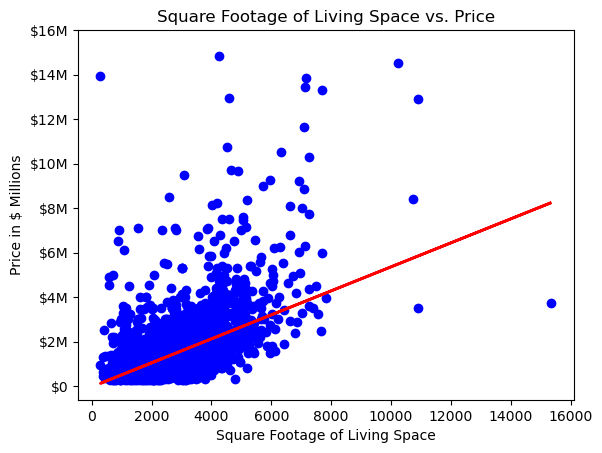

In [46]:

# Plot the data and the linear regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Square Footage of Living Space vs. Price')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price in $ Millions')

# Set y ticks in millions of dollars
plt.yticks(np.arange(0, 16_000_001, 2_000_000), ['$0', '$2M', '$4M', '$6M', '$8M', '$10M', '$12M', '$14M', '$16M'])
plt.show()


<AxesSubplot: ylabel='Frequency'>

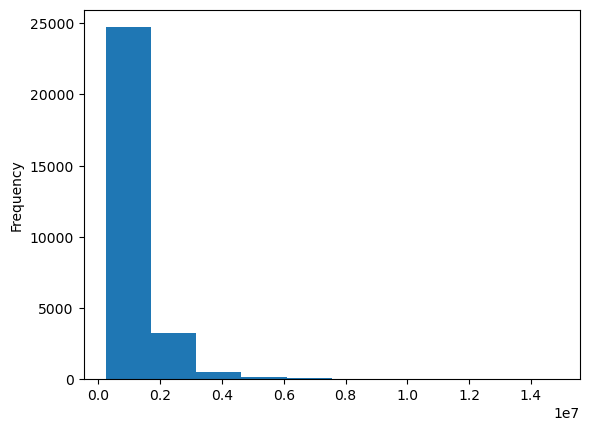

In [47]:
# Check the distributions of numeric features and identify potential outliers
house_data_df['price'].plot(kind='hist')

array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'sqft_living'}>,
        <AxesSubplot: title={'center': 'sqft_lot'}>],
       [<AxesSubplot: title={'center': 'floors'}>,
        <AxesSubplot: title={'center': 'waterfront'}>,
        <AxesSubplot: title={'center': 'greenbelt'}>,
        <AxesSubplot: title={'center': 'nuisance'}>,
        <AxesSubplot: title={'center': 'view'}>],
       [<AxesSubplot: title={'center': 'condition'}>,
        <AxesSubplot: title={'center': 'grade'}>,
        <AxesSubplot: title={'center': 'sqft_above'}>,
        <AxesSubplot: title={'center': 'sqft_basement'}>,
        <AxesSubplot: title={'center': 'sqft_garage'}>],
       [<AxesSubplot: title={'center': 'sqft_patio'}>,
        <AxesSubplot: title={'center': 'yr_built'}>,
        <AxesSubplot: title={'center': 'lat'}>,
        <AxesSubplot: title={'center': '

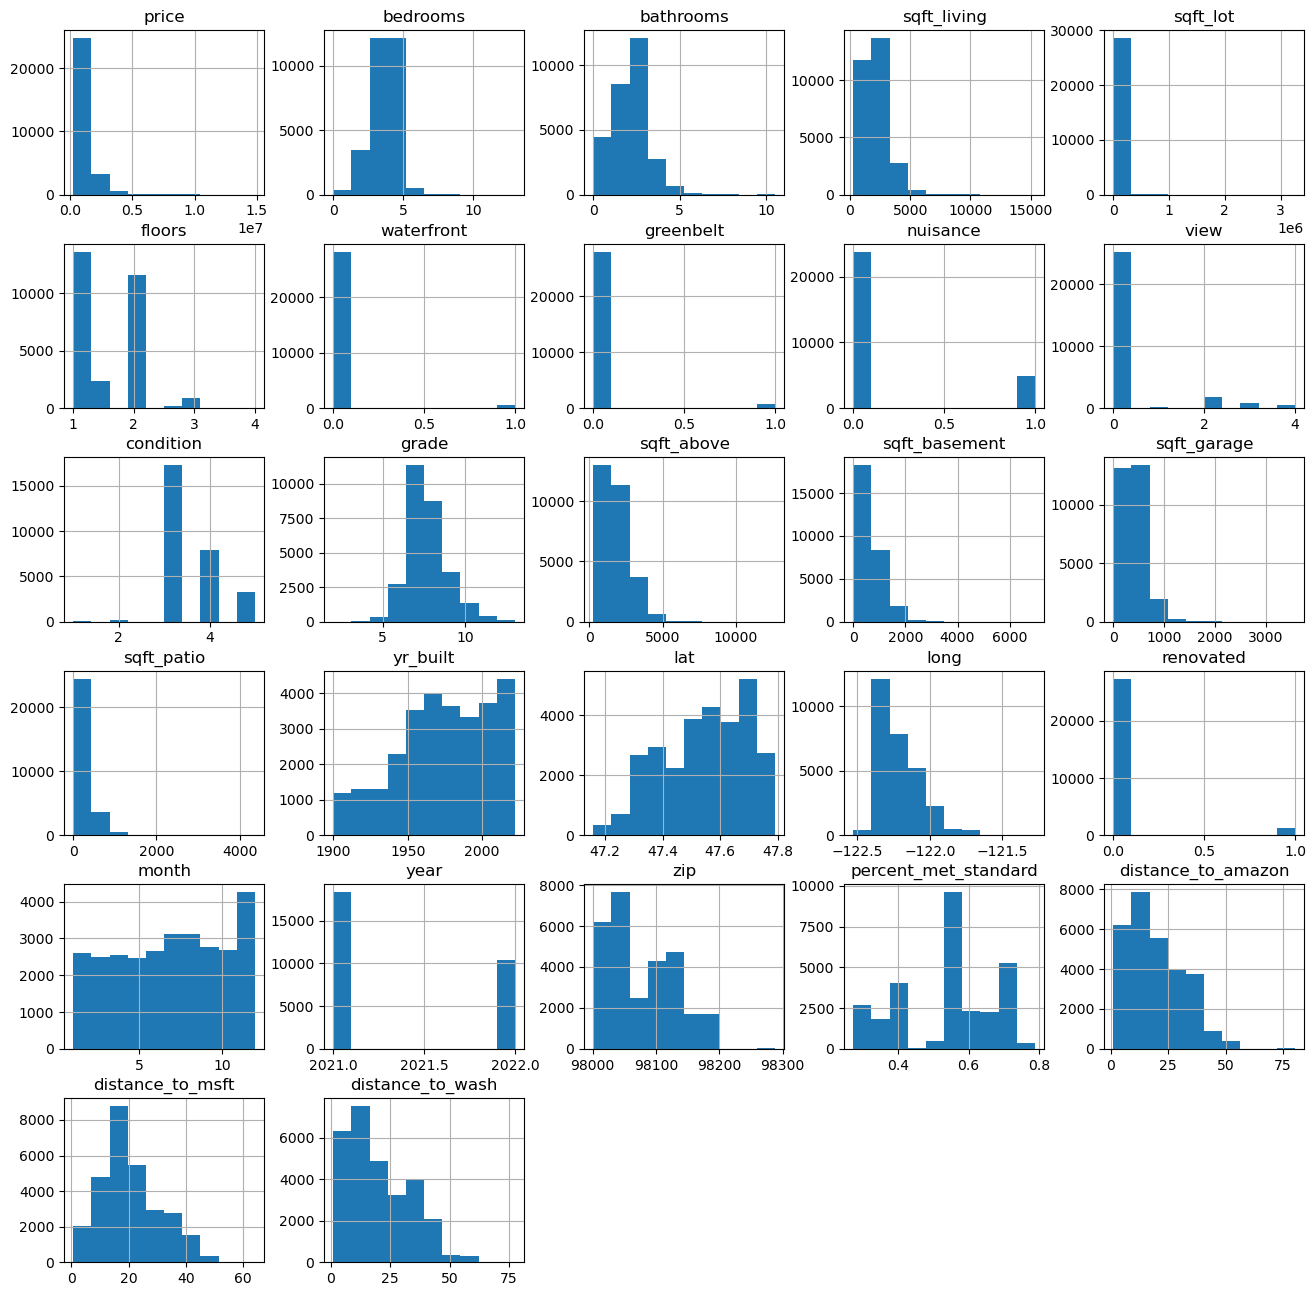

In [49]:
house_data_df.hist(figsize=(16, 16))

In [52]:
house_data_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,28731.0,1122036.14,836930.10,250000.00,650000.00,875000.00,1320000.00,14850000.00
bedrooms,28731.0,3.44,0.98,0.00,3.00,3.00,4.00,13.00
bathrooms,28731.0,2.34,0.89,0.00,2.00,2.50,3.00,10.50
sqft_living,28731.0,2136.84,974.59,260.00,1440.00,1950.00,2640.00,15360.00
sqft_lot,28731.0,17024.74,59953.83,402.00,5000.00,7560.00,10754.00,3253932.00
floors,28731.0,1.52,0.55,1.00,1.00,1.50,2.00,4.00
waterfront,28731.0,0.02,0.13,0.00,0.00,0.00,0.00,1.00
greenbelt,28731.0,0.03,0.16,0.00,0.00,0.00,0.00,1.00
nuisance,28731.0,0.17,0.38,0.00,0.00,0.00,0.00,1.00
view,28731.0,0.30,0.86,0.00,0.00,0.00,0.00,4.00


In [53]:
house_data_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'lat', 'long', 'renovated',
       'month', 'year', 'zip', 'percent_met_standard', 'distance_to_amazon',
       'distance_to_msft', 'distance_to_wash'],
      dtype='object')

### Linear Regression Model #2
- Look just at the relationship between all original numeric features and price

In [54]:
## Declare features and target variable
original_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'lat', 'long', 'renovated']
X = house_data_df[original_features].select_dtypes(exclude=['object'])
y = house_data_df['price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [58]:
regression_results(y_test,y_pred)

explained_variance:  0.5537
r2:  0.5536
MAE:  315802.7768
MSE:  372913478990.8076
RMSE:  610666.422


In [56]:
lr.coef_

array([-5.94486466e+04,  6.92009878e+04,  1.72695130e+02,  1.80747696e-01,
       -1.30048970e+05,  5.99398051e+05,  1.88577407e+04, -5.69477997e+02,
        9.76056555e+04,  5.67788221e+04,  1.96943998e+05,  2.41628786e+02,
        4.23999335e+01, -8.56446838e+01,  9.52205863e+01, -2.37162179e+03,
        1.47669679e+06,  5.51458240e+04,  1.12176840e+05])

### Linear Regression Model #3
- Apply SciKit Learn PowerTransform to Price (our target variable)

In [59]:
pt = PowerTransformer()

# Declare features and target variable
X = house_data_df.drop("price", axis=1).select_dtypes(exclude=['object'])
y = np.array(house_data_df["price"]).reshape(-1, 1)


# Train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Encode the target
y_train = pt.fit_transform(y_train)
y_test = pt.transform(y_test)

# Fit/predict/score
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [60]:
regression_results(y_test, preds)

explained_variance:  0.7342
r2:  0.7342
MAE:  0.3566
MSE:  0.2687
RMSE:  0.5183


In [61]:
print(lr.coef_)

[[ 3.49770897e-02  6.81000309e-02  1.33462304e-04  1.11184781e-06
  -3.81028599e-02  4.27026060e-01  8.31949447e-02 -8.34264583e-02
   1.08708197e-01  1.24592029e-01  1.96239466e-01  2.22083980e-04
   4.80535119e-05  9.86333723e-05  5.77030572e-05 -1.02844326e-03
  -8.49446114e-01  8.47540247e-01  1.83649353e-01  1.56223942e-02
   3.43586973e-01 -1.05451628e-03  1.49484581e+00  2.33975122e-02
  -4.22502932e-04 -6.15727322e-02]]


In [62]:
print(X.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'lat', 'long', 'renovated', 'month', 'year', 'zip',
       'percent_met_standard', 'distance_to_amazon', 'distance_to_msft',
       'distance_to_wash'],
      dtype='object')


In [63]:
all_num_feature_summary_df = pd.DataFrame(np.array(lr.coef_).reshape(-1,1), X.columns, columns=['Coefficients'])
print(all_num_feature_summary_df)

                      Coefficients
bedrooms                  0.034977
bathrooms                 0.068100
sqft_living               0.000133
sqft_lot                  0.000001
floors                   -0.038103
waterfront                0.427026
greenbelt                 0.083195
nuisance                 -0.083426
view                      0.108708
condition                 0.124592
grade                     0.196239
sqft_above                0.000222
sqft_basement             0.000048
sqft_garage               0.000099
sqft_patio                0.000058
yr_built                 -0.001028
lat                      -0.849446
long                      0.847540
renovated                 0.183649
month                     0.015622
year                      0.343587
zip                      -0.001055
percent_met_standard      1.494846
distance_to_amazon        0.023398
distance_to_msft         -0.000423
distance_to_wash         -0.061573


In [64]:
f_values, p_values = f_regression(X, y)
print(f_values, p_values)

[3.05769937e+03 9.82890179e+03 2.01990105e+04 2.55788475e+02
 1.30096981e+03 1.57914625e+03 1.51874473e+02 2.45135206e+00
 3.40480650e+03 5.76490373e+00 1.62329031e+04 1.35175634e+04
 1.99640502e+03 2.34355412e+03 3.35747985e+03 3.34091225e+02
 3.10897978e+03 2.27235537e+02 2.17550094e+02 1.00967685e+02
 1.76294960e+02 3.53068721e+02 6.11518932e+03 1.57108854e+03
 6.48029076e+03 2.48775461e+03] [0.00000000e+000 0.00000000e+000 0.00000000e+000 2.51354261e-057
 1.15277891e-278 0.00000000e+000 8.26546932e-035 1.17434699e-001
 0.00000000e+000 1.63556962e-002 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 3.25702385e-074
 0.00000000e+000 3.75033570e-051 4.68149316e-049 1.02327049e-023
 4.09950301e-040 2.68425913e-078 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
all_num_feature_summary_df['f_values'] = f_values
all_num_feature_summary_df['p_values'] = p_values
all_num_feature_summary_df

,Coefficients,f_values,p_values
bedrooms,0.034977,3057.699367,0.000000e+00
bathrooms,0.068100,9828.901795,0.000000e+00
sqft_living,0.000133,20199.010516,0.000000e+00
sqft_lot,0.000001,255.788475,2.513543e-57
floors,-0.038103,1300.969806,1.152779e-278
waterfront,0.427026,1579.146251,0.000000e+00
greenbelt,0.083195,151.874473,8.265469e-35
nuisance,-0.083426,2.451352,1.174347e-01
view,0.108708,3404.806502,0.000000e+00
condition,0.124592,5.764904,1.635570e-02


### Linear Regression Model #4
- one hot encode our categorical variables and include them for this iteration

In [66]:
# One hot encode sewer_system and heat_source to include in next model
numeric_features_df = house_data_df.drop("price", axis=1).select_dtypes(exclude=['object'])
df_sewer_system = pd.get_dummies(house_data_df['sewer_system'], prefix='sewer_system')
df_heat_source = pd.get_dummies(house_data_df['heat_source'], prefix='heat_source')
num_and_cat_features_df = pd.concat([numeric_features_df, df_sewer_system, df_heat_source], axis=1)
num_and_cat_features_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,...,percent_met_standard,distance_to_amazon,distance_to_msft,distance_to_wash,sewer_system_PRIVATE,sewer_system_PUBLIC,heat_source_Electricity,heat_source_Gas,heat_source_Oil,heat_source_Solar_Other
0,4,1.0,1180,7140,1.0,0,0,0,0,4,...,0.368621,20.337222,20.567735,23.119222,0,1,0,1,0,0
40,3,2.0,1830,7969,1.0,0,0,0,0,3,...,0.368621,18.968165,20.542453,22.004537,0,1,0,1,0,0
111,4,2.0,2170,7520,1.0,0,0,0,0,3,...,0.368621,20.187751,20.342688,22.940951,0,1,0,1,0,0
229,4,2.0,1400,10364,1.5,0,0,0,0,4,...,0.368621,20.814923,22.445961,23.974044,0,1,1,0,0,0
308,3,2.0,1520,8250,1.0,0,0,0,0,3,...,0.368621,20.515316,20.656210,23.285361,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,3,2.5,3610,44686,2.0,0,0,1,0,5,...,0.476190,74.454885,58.355343,71.668351,0,1,0,1,0,0
24528,2,1.0,800,9927,1.5,0,0,1,0,3,...,0.476190,77.411320,61.311416,74.619532,1,0,1,0,0,0
26787,1,1.0,620,10400,1.5,0,0,1,0,3,...,0.476190,77.073808,60.973394,74.279839,1,0,1,0,0,0
28070,2,1.5,980,5000,2.0,0,0,0,0,3,...,0.476190,74.073905,57.975391,71.292830,0,1,1,0,0,0


In [67]:
pt = PowerTransformer()

# Declare features and target variable
X = num_and_cat_features_df
y = np.array(house_data_df["price"]).reshape(-1, 1)

# Train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Encode the target
y_train = pt.fit_transform(y_train)
y_test = pt.transform(y_test)

# Fit/predict/score
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [68]:
regression_results(y_test, preds)

explained_variance:  0.7358
r2:  0.7358
MAE:  0.3551
MSE:  0.2671
RMSE:  0.5168


In [69]:
num_and_cat_features_summary = pd.DataFrame(np.array(lr.coef_).reshape(-1,1), X.columns, columns=['Coefficients'])
print(num_and_cat_features_summary)
print(len(num_and_cat_features_summary))

                         Coefficients
bedrooms                     0.033138
bathrooms                    0.067522
sqft_living                  0.000135
sqft_lot                     0.000001
floors                      -0.038465
waterfront                   0.439736
greenbelt                    0.079077
nuisance                    -0.080756
view                         0.109593
condition                    0.126025
grade                        0.191945
sqft_above                   0.000217
sqft_basement                0.000045
sqft_garage                  0.000084
sqft_patio                   0.000069
yr_built                    -0.000835
lat                         -0.824687
long                         0.863058
renovated                    0.191267
month                        0.015860
year                         0.345405
zip                         -0.001015
percent_met_standard         1.502844
distance_to_amazon           0.022514
distance_to_msft             0.000350
distance_to_

In [70]:
f_values, p_values = f_regression(X, y)
print(f_values, p_values)

[3.05769937e+03 9.82890179e+03 2.01990105e+04 2.55788475e+02
 1.30096981e+03 1.57914625e+03 1.51874473e+02 2.45135206e+00
 3.40480650e+03 5.76490373e+00 1.62329031e+04 1.35175634e+04
 1.99640502e+03 2.34355412e+03 3.35747985e+03 3.34091225e+02
 3.10897978e+03 2.27235537e+02 2.17550094e+02 1.00967685e+02
 1.76294960e+02 3.53068721e+02 6.11518932e+03 1.57108854e+03
 6.48029076e+03 2.48775461e+03 1.77879302e+01 1.77879302e+01
 4.56602595e+02 6.74090542e+02 1.51608077e+02 2.06601028e+01] [0.00000000e+000 0.00000000e+000 0.00000000e+000 2.51354261e-057
 1.15277891e-278 0.00000000e+000 8.26546932e-035 1.17434699e-001
 0.00000000e+000 1.63556962e-002 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 3.25702385e-074
 0.00000000e+000 3.75033570e-051 4.68149316e-049 1.02327049e-023
 4.09950301e-040 2.68425913e-078 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 2.47700593e-005 2.47700593e-005
 1.60073124e-100 6.39658846e-147 9.44463388e-035 5.50704

/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
num_and_cat_features_summary['f_values'] = f_values
num_and_cat_features_summary['p_values'] = p_values
num_and_cat_features_summary

,Coefficients,f_values,p_values
bedrooms,0.033138,3057.699367,0.000000e+00
bathrooms,0.067522,9828.901795,0.000000e+00
sqft_living,0.000135,20199.010516,0.000000e+00
sqft_lot,0.000001,255.788475,2.513543e-57
floors,-0.038465,1300.969806,1.152779e-278
waterfront,0.439736,1579.146251,0.000000e+00
greenbelt,0.079077,151.874473,8.265469e-35
nuisance,-0.080756,2.451352,1.174347e-01
view,0.109593,3404.806502,0.000000e+00
condition,0.126025,5.764904,1.635570e-02


### MLR Model #5
- apply PowerTransform to all sqft feature variables

In [74]:
# Declare features and target variable
X = num_and_cat_features_df
y = np.array(house_data_df["price"]).reshape(-1, 1)

# Apply power transformation to the relevant features
pt = PowerTransformer()
X[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']] = \
pt.fit_transform(X[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Encode the target
y_train = pt.fit_transform(y_train)
y_test = pt.transform(y_test)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Make predictions on test set
preds = lr.predict(X_test)

# Evaluate model performance
regression_results(y_test, preds)

explained_variance:  0.7517
r2:  0.7517
MAE:  0.3417
MSE:  0.2509
RMSE:  0.5009


In [75]:
pt_features_summary = pd.DataFrame(np.array(lr.coef_).reshape(-1,1), X.columns, columns=['Coefficients'])
f_values, p_values = f_regression(X, y)
pt_features_summary['f_values'] = f_values
pt_features_summary['p_values'] = p_values
pt_features_summary

/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Coefficients,f_values,p_values
bedrooms,-0.011534,3057.699367,0.000000e+00
bathrooms,0.063799,9828.901795,0.000000e+00
sqft_living,0.207050,12997.904279,0.000000e+00
sqft_lot,0.182268,1283.486128,4.985036e-275
floors,0.043417,1300.969806,1.152779e-278
waterfront,0.421961,1579.146251,0.000000e+00
greenbelt,0.089376,151.874473,8.265469e-35
nuisance,-0.082493,2.451352,1.174347e-01
view,0.099854,3404.806502,0.000000e+00
condition,0.110996,5.764904,1.635570e-02


### MLR Model #5
- One hot encode the zip code which the model was treating numerically even though they are actually more categorical

In [76]:
# One hot encode zip codes
encoded_zips_df = pd.get_dummies(num_and_cat_features_df['zip'], prefix='zip')
encoded_zips_df = pd.concat([num_and_cat_features_df, encoded_zips_df], axis=1)
encoded_zips_df = encoded_zips_df.drop(columns='zip')
encoded_zips_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,zip_98288
0,4,1.0,-1.129313,-0.046270,1.0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
40,3,2.0,-0.149275,0.070706,1.0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
111,4,2.0,0.239072,0.009149,1.0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
229,4,2.0,-0.750849,0.343948,1.5,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
308,3,2.0,-0.567273,0.107275,1.0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,3,2.5,1.425279,1.694726,2.0,0,0,1,0,5,...,0,0,0,0,0,0,0,0,0,1
24528,2,1.0,-1.974120,0.299796,1.5,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,1
26787,1,1.0,-2.516617,0.347491,1.5,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,1
28070,2,1.5,-1.535677,-0.437095,2.0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1


In [78]:
# Declare features and target variable
X = encoded_zips_df
y = np.array(house_data_df["price"]).reshape(-1, 1)

# Apply power transformation to the relevant features
pt = PowerTransformer()
X[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']] = \
pt.fit_transform(X[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Encode the target
y_train = pt.fit_transform(y_train)
y_test = pt.transform(y_test)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Make predictions on test set
preds = lr.predict(X_test)

# Evaluate model performance
regression_results(y_test, preds)

explained_variance:  0.7928
r2:  0.7928
MAE:  0.2989
MSE:  0.2094
RMSE:  0.4576


In [ ]:
all_features_summary = pd.DataFrame(np.array(lr.coef_).reshape(-1,1), X.columns, columns=['Coefficients'])
f_values, p_values = f_regression(X, y)
all_features_summary['f_values'] = f_values
all_features_summary['p_values'] = p_values
all_features_summary

### MLR Model #7
- Apply StandardScaler to every column we didn't PowerTransform

In [81]:
# Declare features and target variable
X = encoded_zips_df
y = np.array(house_data_df["price"]).reshape(-1, 1)

# Apply power transformation to the relevant features
pt = PowerTransformer()
ss = StandardScaler()
columns_to_pt = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']

X[columns_to_pt] = pt.fit_transform(X[columns_to_pt])

columns_to_ss = list(set(encoded_zips_df.columns) - set(columns_to_pt))
X[columns_to_ss] = ss.fit_transform(X[columns_to_ss])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Encode the target
y_train = pt.fit_transform(y_train)
y_test = pt.transform(y_test)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Make predictions on test set
preds = lr.predict(X_test)

# Evaluate model performance
regression_results(y_test, preds)

explained_variance:  0.7928
r2:  0.7928
MAE:  0.2988
MSE:  0.2094
RMSE:  0.4576


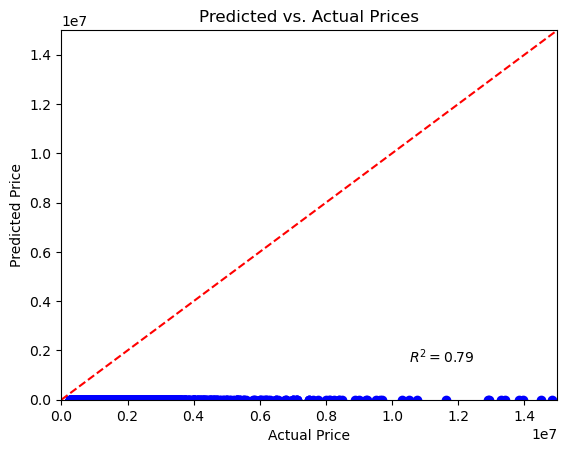

In [83]:
# Scale back data for plotting
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
plt.ticklabel_format(useOffset=False)
## Convert predicted and actual prices back to original scale .flatten()
y_test_orig = pt.inverse_transform(y_test)
y_pred_orig = pt.inverse_transform(preds)

## Plot predicted vs actual prices
plt.scatter(y_test_orig, preds, color='blue')
plt.plot([0, 15000000], [0, 15000000], color='red', linestyle='--')
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.ticklabel_format(useOffset=False)
# Set the x and y axis limits
plt.xlim(0, 15_000_000)
plt.ylim(0, 15_000_000)
## Show R^2 score in the plot
r2 = 0.7928
plt.text(0.7 * 15_000_000, 0.1 * 15_000_000, f'$R^2={r2:.2f}$')
plt.show()

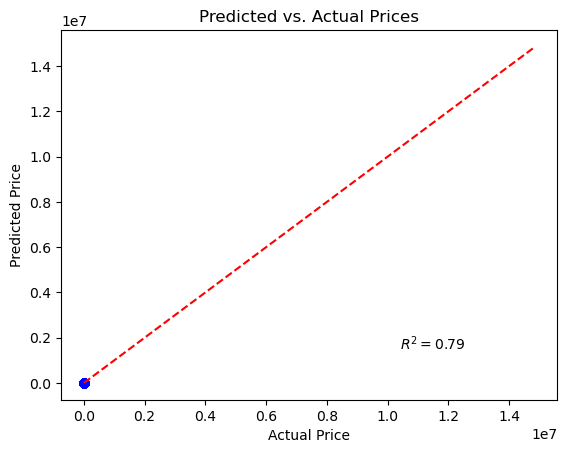

In [84]:
# Plot the predicted vs. actual prices
plt.scatter(y_test, preds, color='blue')
plt.plot([0, np.max(y)], [0, np.max(y)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
# Show the R^2 score in the plot
r2 = metrics.r2_score(y_test, preds)
plt.text(0.7 * np.max(y), 0.1 * np.max(y), f'$R^2={r2:.2f}$')
plt.show()

In [85]:
all_features_scaled_summary = pd.DataFrame(np.array(lr.coef_).reshape(-1,1), X.columns, columns=['Coefficients'])
f_values, p_values = f_regression(X, y)
all_features_scaled_summary['f_values'] = f_values
all_features_scaled_summary['p_values'] = p_values
pd.set_option("display.max_rows", None)
all_features_scaled_summary

/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Coefficients,f_values,p_values
bedrooms,1.978201e-03,3057.699367,0.000000e+00
bathrooms,4.748515e-02,9828.901795,0.000000e+00
sqft_living,2.106015e-01,12997.904556,0.000000e+00
sqft_lot,2.241768e-01,1283.613669,4.689612e-275
floors,1.538392e-02,1300.969806,1.152779e-278
waterfront,5.568799e-02,1579.146251,0.000000e+00
greenbelt,1.373587e-02,151.874473,8.265469e-35
nuisance,-3.251106e-02,2.451352,1.174347e-01
view,7.445848e-02,3404.806502,0.000000e+00
condition,8.448112e-02,5.764904,1.635570e-02


In [90]:
# Declare features and target variable
X = encoded_zips_df
y = np.array(house_data_df["price"]).reshape(-1, 1)

# Apply power transformation to the relevant features
pt = PowerTransformer()
ss = StandardScaler()
columns_to_pt = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']

X[columns_to_pt] = pt.fit_transform(X[columns_to_pt])

columns_to_ss = list(set(encoded_zips_df.columns) - set(columns_to_pt))
X[columns_to_ss] = ss.fit_transform(X[columns_to_ss])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Encode the target
y_train = pt.fit_transform(y_train)
y_test = pt.transform(y_test)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Make predictions on test set
preds = lr.predict(X_test)

# Evaluate model performance
regression_results(y_test, preds)

explained_variance:  0.7928
r2:  0.7928
MAE:  0.2988
MSE:  0.2094
RMSE:  0.4576


In [91]:
all_features_scalled_summary = pd.DataFrame(np.array(lr.coef_).reshape(-1,1), X.columns, columns=['Coefficients'])
f_values, p_values = f_regression(X, y)
all_features_scalled_summary['f_values'] = f_values
all_features_scalled_summary['p_values'] = p_values
all_features_scalled_summary

/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


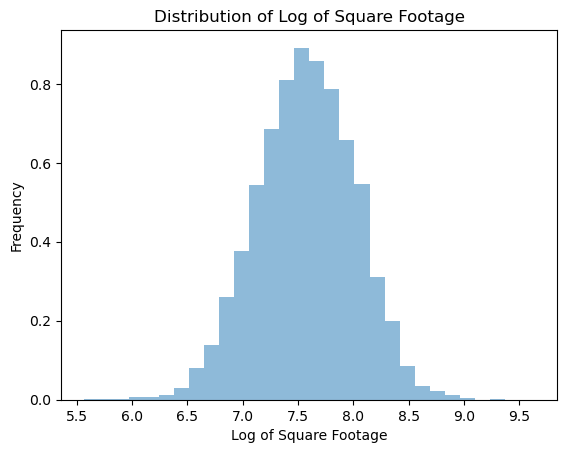

In [92]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy import log1p

# Create a histogram of house price data
plt.hist(log1p(house_data_df['sqft_living']), bins=30, density=True, alpha=0.5)

# Set the title and axis labels
plt.title('Distribution of Log of Square Footage')
plt.xlabel('Log of Square Footage')
plt.ylabel('Frequency')

# Display the plot
plt.show()